## Neural Network

In this part we will use a neural network to predict the price of the houses.

In [1]:
import pandas as pd 

df_not_scaled = pd.read_csv('../data/not_scaled_data.csv')

## Target = log(price)



In [2]:
from sklearn import metrics
import numpy as np

def calc_median_absolute_percentage_error(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_metrics(y_pred, y_test):
    r2 = metrics.r2_score(y_test, y_pred)
    smse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mean_ae = metrics.mean_absolute_error(y_test, y_pred)
    mean_ape = metrics.mean_absolute_percentage_error(y_test, y_pred)
    median_ae = metrics.median_absolute_error(y_test, y_pred)
    median_ape = calc_median_absolute_percentage_error(y_test, y_pred)
    return [r2, smse, mean_ae, mean_ape, median_ae, median_ape]
    
def within_x_percent(y_pred, y_test, x):
    return np.sum(np.abs((y_pred - y_test)/y_test) < x) / len(y_test) * 100

def show_metrics(y_pred, y_test, target_scaler = None, logarithm = False):        
    metrics_df = pd.DataFrame(columns=['Target', 'R2', 'Root Mean Squared Error', 'Mean Absolute Error',
                                            'Mean Absolute Percentage Error', 'Median Absolute Error', 'Median Absolute Percentage Error'])
    
    metrics_df.loc[0] = ['Target as it is'] + calculate_metrics(y_pred, y_test)
    
    if target_scaler:
        y_pred = target_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
        metrics_df.loc[1] = ['Scaled Target is inversed to real value'] + calculate_metrics(y_pred, y_test)

    
    if logarithm:
        y_pred = np.power(10, y_pred)
        y_test = np.power(10, y_test)
        metrics_df.loc[2] = ['Target -> 10 ^ Target'] + calculate_metrics(y_pred, y_test)
    
    dist_df = pd.DataFrame({"within 5%": [within_x_percent(y_pred, y_test, 0.05)],
                    "within 10%": [within_x_percent(y_pred, y_test, 0.10)],
                    "within 20%": [within_x_percent(y_pred, y_test, 0.20)],
                    "within 50%": [within_x_percent(y_pred, y_test, 0.50)],
                    "median absolute percentage error": [calc_median_absolute_percentage_error(y_test, y_pred)]}, index=['Percentage'])
        
    display(metrics_df)
    display(dist_df)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6826 - val_loss: 0.3895
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3803 - val_loss: 0.3360
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3318 - val_loss: 0.3152
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3213 - val_loss: 0.3039
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3017 - val_loss: 0.2971
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2928 - val_loss: 0.2899
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2909 - val_loss: 0.2807
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2854 - val_loss: 0.2774
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2906 - val_loss: 0.2751
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2910 - val_loss: 0.2716
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2716 - val_loss: 0.2705
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2662 - val_lo

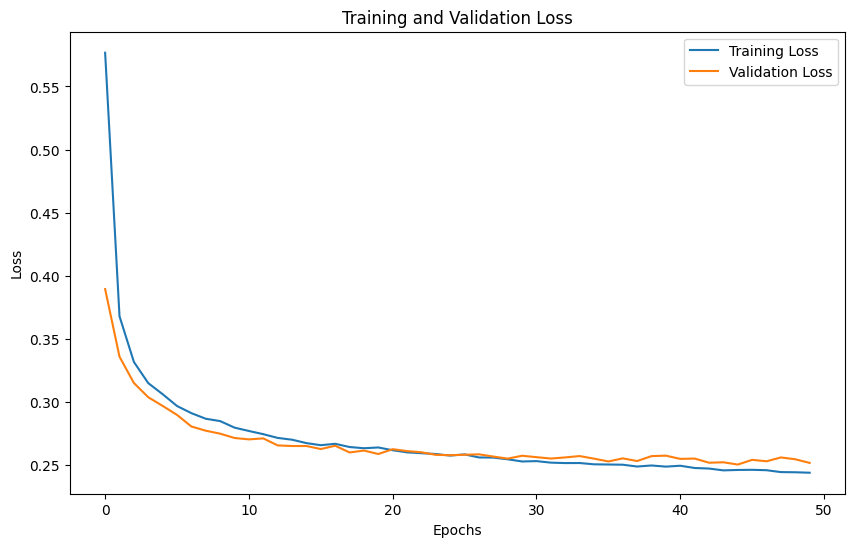

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

#features = df_not_scaled.drop(columns=['price', 'log_price'])
features = df_not_scaled[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target = df_not_scaled['log_price']
target_scaler = StandardScaler()
target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='sigmoid'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [4]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=target_scaler, logarithm=True)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.891152,0.336917,0.241140,1.271788,0.170873,29.121596
1,Scaled Target is inversed to real value,0.891152,0.092201,0.065991,0.010975,0.046761,0.776974
2,Target -> 10 ^ Target,0.935464,320912.137964,204539.018479,0.161090,114777.562500,10.796489


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,24.392819,47.624076,72.122492,96.092925,10.796489


### Target = price, loss function = MAPE

Epoch 1/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 99.9999 - val_loss: 99.9966
Epoch 2/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 99.9781 - val_loss: 99.7414
Epoch 3/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 99.3264 - val_loss: 96.4212
Epoch 4/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 93.9350 - val_loss: 83.6377
Epoch 5/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 79.5716 - val_loss: 74.9182
Epoch 6/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71.6635 - val_loss: 72.1996
Epoch 7/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69.6663 - val_loss: 69.1853
Epoch 8/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 65.9925 - val_loss: 65.7011
Epoch 9/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 63.1264 - val_loss: 61.8541
Epoch 10/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 59.0361 - val_loss: 57.6228
Epoch 11/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55.3277 - val_loss: 52.9417
Epoch 12/150
95/95 ━━━━━━━━━━━━━━━━━━━━

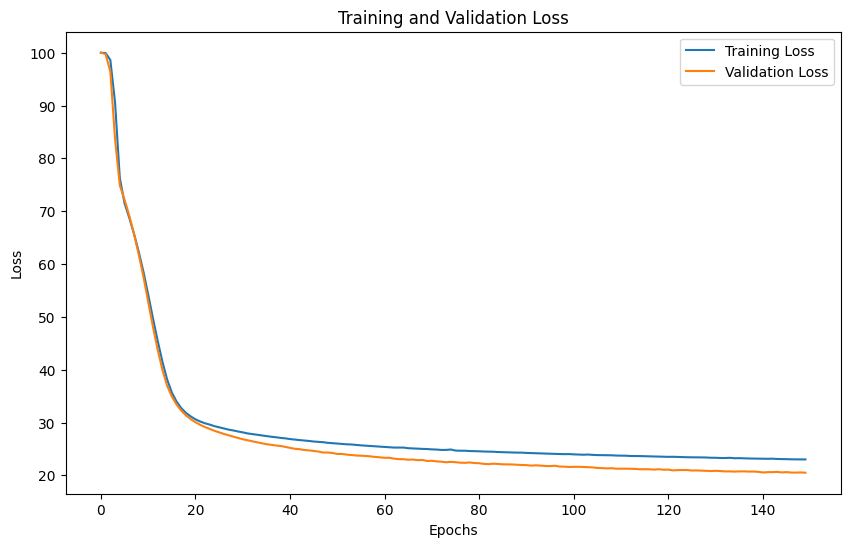

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

features = df_not_scaled.drop(columns=['price', 'log_price'])
# features = df_not_scaled[["log_livingAreaValue", "log_lotAreaValue", "rentZestimate",
#                           "bedrooms", "bathrooms", "lotAreaValue", "livingAreaValue", "parkingCapacity", 'taxAssessedValue', 'hasCooling']]
target = df_not_scaled['price']
target_scaler = StandardScaler()
#target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_percentage_error')

history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=None, logarithm=False)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.630066,768329.472462,362435.212167,0.204395,160143.125,16.470361


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,17.740232,32.946146,58.817318,94.192186,16.470361


### Target = price, loss function = MAE

Epoch 1/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1445033.5000 - val_loss: 1400221.5000
Epoch 2/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1381516.2500 - val_loss: 1400196.5000
Epoch 3/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1416635.3750 - val_loss: 1398439.1250
Epoch 4/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1442524.6250 - val_loss: 1379257.1250
Epoch 5/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1337681.1250 - val_loss: 1277178.8750
Epoch 6/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1197321.8750 - val_loss: 991037.3750
Epoch 7/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 912658.3750 - val_loss: 701148.1250
Epoch 8/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 638826.7500 - val_loss: 573463.0000
Epoch 9/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 535414.5000 - val_loss: 529770.3125
Epoch 10/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 508951.0938 - val_loss: 498880.7188
Epoch 11/150
95/95 ━━━━━━━━━━━━━━━━━━━

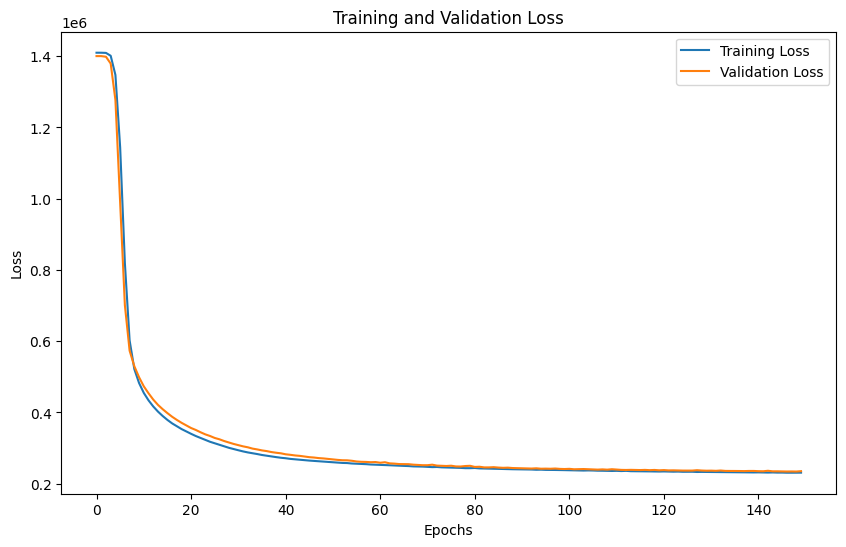

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

features = df_not_scaled.drop(columns=['price', 'log_price'])
# features = df_not_scaled[["log_livingAreaValue", "log_lotAreaValue", "rentZestimate",
#                           "bedrooms", "bathrooms", "lotAreaValue", "livingAreaValue", "parkingCapacity", 'taxAssessedValue', 'hasCooling']]
target = df_not_scaled['price']
#target_scaler = StandardScaler()
#target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=None, logarithm=False)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.926685,342043.445639,219928.822862,0.171652,128421.375,12.404817


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,23.970433,41.710665,70.644139,95.987328,12.404817


## Filtered data

In [9]:
df_filtered = df_not_scaled[df_not_scaled['price'] < 2000000]

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7792 - val_loss: 0.7219
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6740 - val_loss: 0.5379
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4994 - val_loss: 0.4537
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4373 - val_loss: 0.4265
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4177 - val_loss: 0.4128
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4059 - val_loss: 0.4003
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3876 - val_loss: 0.3923
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3660 - val_loss: 0.3861
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3764 - val_loss: 0.3806
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3585 - val_loss: 0.3807
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3695 - val_loss: 0.3823
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3605 - val_lo

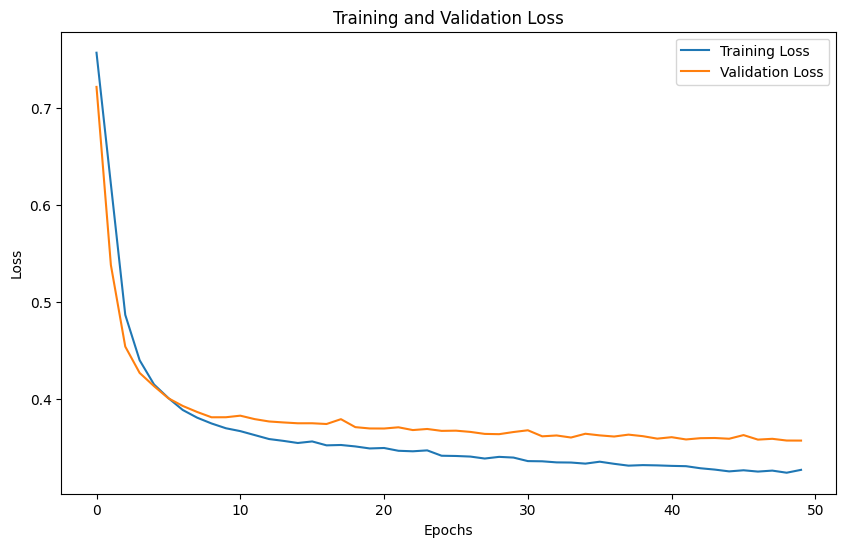

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

#features = df_filtered.drop(columns=['price', 'log_price'])
features = df_filtered[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target = df_filtered['log_price']
target_scaler = StandardScaler()
target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=target_scaler, logarithm=True)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.749033,0.511450,0.363282,8.112021,0.248246,38.503778
1,Scaled Target is inversed to real value,0.749033,0.094284,0.066970,0.011321,0.045764,0.770785
2,Target -> 10 ^ Target,0.743612,202652.870480,143533.033149,0.160572,92202.687500,10.269627


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,25.56962,48.734177,73.291139,95.949367,10.269627


Epoch 1/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 967092.3125 - val_loss: 1009093.2500
Epoch 2/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 973171.0000 - val_loss: 1007901.4375
Epoch 3/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 977303.3125 - val_loss: 997312.0000
Epoch 4/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 956334.1875 - val_loss: 949487.8750
Epoch 5/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 891952.0000 - val_loss: 809301.8125
Epoch 6/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 723193.8750 - val_loss: 583534.2500
Epoch 7/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 508522.4062 - val_loss: 399961.0312
Epoch 8/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 383522.0938 - val_loss: 338381.0000
Epoch 9/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 312606.1875 - val_loss: 309682.4688
Epoch 10/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 303270.7812 - val_loss: 289445.2812
Epoch 11/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

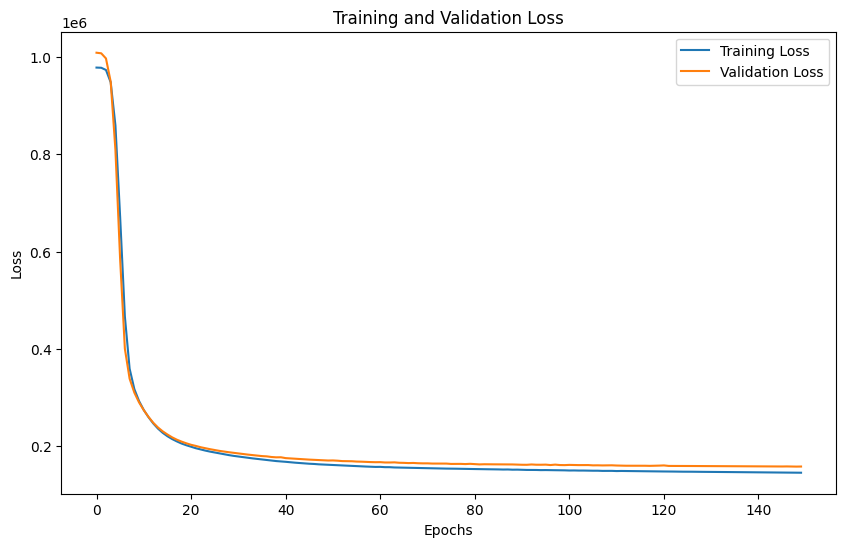

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

features = df_filtered.drop(columns=['price', 'log_price'])
# features = df_filtered[["log_livingAreaValue", "log_lotAreaValue", "rentZestimate",
#                           "bedrooms", "bathrooms", "lotAreaValue", "livingAreaValue", "parkingCapacity", 'taxAssessedValue', 'hasCooling']]
target = df_filtered['price']
#target_scaler = StandardScaler()
#target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=None, logarithm=False)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.72022,211695.563144,151779.288093,0.175312,106942.671875,11.560156


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,22.78481,43.924051,71.898734,95.189873,11.560156


### Splitting to quantiles using classification then use regression

In [14]:
num_quantiles = 4

df_not_scaled['price_quantile'] = pd.qcut(df_not_scaled['price'], num_quantiles, labels=False)

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3770 - loss: 1.3788 - val_accuracy: 0.5618 - val_loss: 1.0782
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5855 - loss: 1.0350 - val_accuracy: 0.6061 - val_loss: 0.9574
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6289 - loss: 0.9234 - val_accuracy: 0.6674 - val_loss: 0.8723
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6596 - loss: 0.8513 - val_accuracy: 0.6822 - val_loss: 0.8226
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7079 - loss: 0.7805 - val_accuracy: 0.6864 - val_loss: 0.7853
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7129 - loss: 0.7538 - val_accuracy: 0.7022 - val_loss: 0.7512
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7317 - loss: 0.6989 - val_accuracy: 0.7181 - val_loss: 0.7272
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7174 - loss: 0.7120 - val_accuracy: 0.

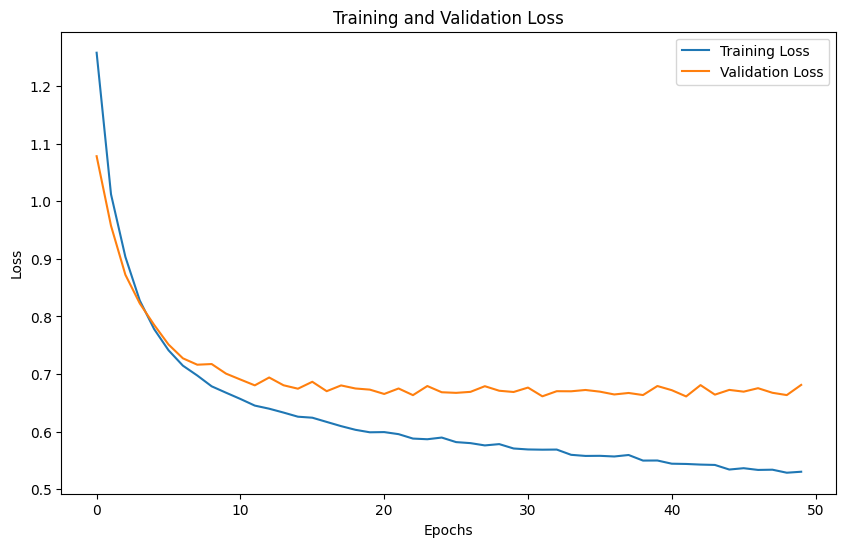

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

quantile_target = df_not_scaled['price_quantile']

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(stratified_split.split(df_not_scaled, quantile_target))

train_df = df_not_scaled.iloc[train_idx]
test_df = df_not_scaled.iloc[test_idx]

features_train = train_df[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target_train = train_df['price_quantile']

features_test = test_df[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target_test = test_df['price_quantile']

scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

num_quantiles = len(np.unique(quantile_target))
quantile_model = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='sigmoid'),
    Dense(num_quantiles, activation='softmax')  # Output layer for classification
])
quantile_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = quantile_model.fit(features_train_scaled, target_train, epochs=50, batch_size=32, validation_data=(features_test_scaled, target_test), verbose=1)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

quantile_model2 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
quantile_model2.fit(features_train_scaled, target_train)

y_pred = quantile_model2.predict(features_test_scaled)

accuracy_score(target_test, y_pred)


0.7360084477296727

#### target = price

Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 558374.3125 - val_loss: 511074.0000
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 508458.6250 - val_loss: 423972.4062
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 391611.7500 - val_loss: 212805.3594
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 170582.2656 - val_loss: 110414.7266
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 97550.0781 - val_loss: 101213.9609
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100075.3906 - val_loss: 101028.3750
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 96695.4922 - val_loss: 100200.6328
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100260.5703 - val_loss: 100740.8047
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 97274.7266 - val_loss: 101343.9141
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93032.7344 - val_loss: 101324.3359
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

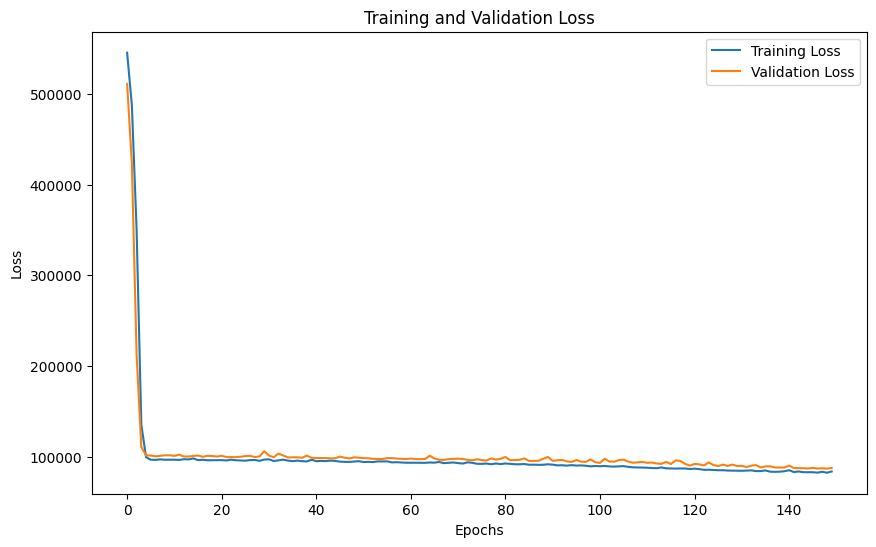

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.224833,108157.484761,78394.232031,0.211827,68024.984375,11.229773


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,23.333333,45.416667,80.833333,95.833333,11.229773


Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 862796.4375 - val_loss: 852404.9375
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 848731.9375 - val_loss: 827754.5625
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 816608.0625 - val_loss: 763486.5625
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 727677.0000 - val_loss: 591109.3125
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 502752.6562 - val_loss: 133754.5156
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93519.1406 - val_loss: 68120.7422
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69417.0625 - val_loss: 62395.6953
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64884.2109 - val_loss: 62400.0000
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64113.0625 - val_loss: 63181.0742
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 64471.8828 - val_loss: 62476.7656
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

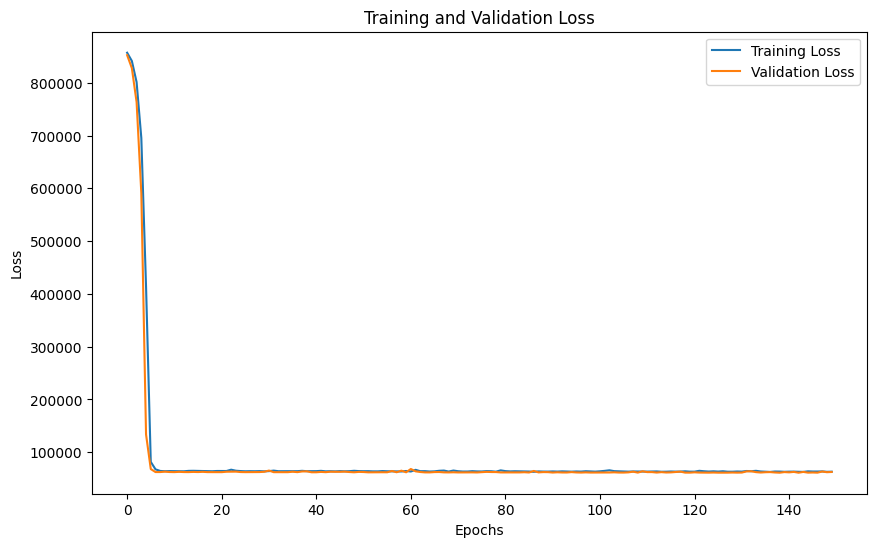

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.002392,77453.535649,65927.583066,0.075673,61936.09375,7.189862


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,32.905983,68.376068,99.57265,100.0,7.189862


Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1247645.0000 - val_loss: 1215460.3750
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1205603.8750 - val_loss: 1125591.2500
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1091776.8750 - val_loss: 902432.1875
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 813458.5625 - val_loss: 376181.5938
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 242467.7031 - val_loss: 149162.3594
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 136548.2969 - val_loss: 136918.8281
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 132234.2656 - val_loss: 137572.1719
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 129362.1484 - val_loss: 136769.3281
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 130456.4609 - val_loss: 136497.8906
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 134010.8594 - val_loss: 136925.8281
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2

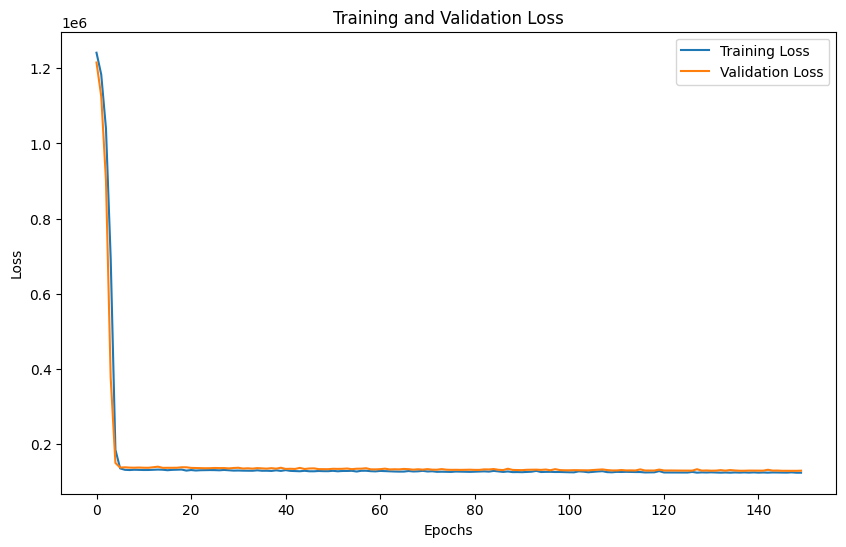

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.145559,143433.63127,117568.774789,0.09512,103985.25,8.164406


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,30.801688,57.383966,94.936709,100.0,8.164406


Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2922321.7500 - val_loss: 2811286.7500
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2895974.5000 - val_loss: 2773917.7500
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2791365.0000 - val_loss: 2665951.5000
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2828843.0000 - val_loss: 2364627.2500
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2320137.7500 - val_loss: 1598665.0000
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1339407.2500 - val_loss: 858824.6250
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 950042.0625 - val_loss: 845665.6875
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 943624.0000 - val_loss: 835889.8750
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 891299.0000 - val_loss: 827427.3125
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 913298.5000 - val_loss: 817038.8750
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━

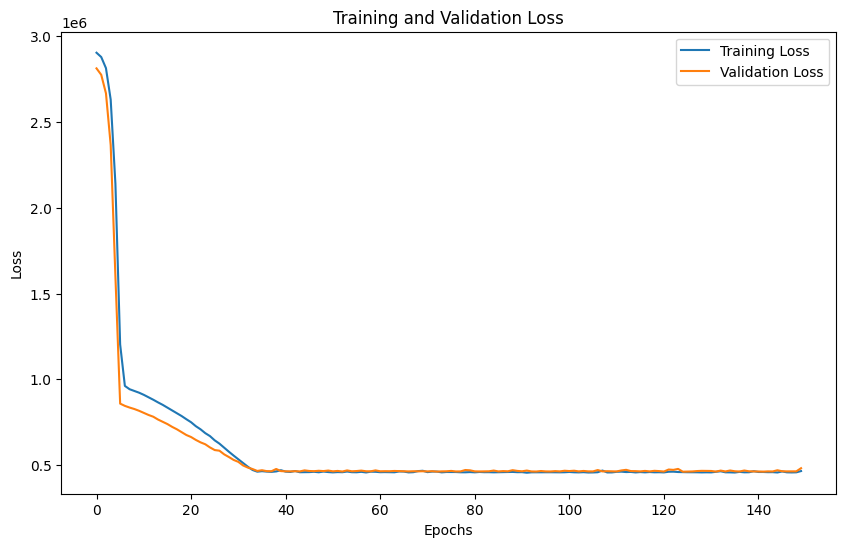

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.788299,1.256789e+06,489124.543962,0.16683,272914.625,11.698107


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,32.627119,45.762712,72.457627,94.067797,11.698107


In [16]:
neural_networks = {}
for i in df_not_scaled['price_quantile'].unique():
    train_data = train_df[train_df['price_quantile'] == i]
    test_data = test_df[test_df['price_quantile'] == i]
    
    features_train = train_data[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
    target_train = train_data['price']

    features_test = test_data[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                            "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                            'hasCooling']]
    target_test = test_data['price']


    scaler = StandardScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_test_scaled = scaler.transform(features_test)
    model = Sequential([
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_absolute_error')

    history = model.fit(features_train, target_train, epochs=150, batch_size=32, validation_split=0.2)

    loss = model.evaluate(features_test, target_test)
    
    neural_networks[i] = model
    print(f'Test Loss: {loss}')

    plt.figure(figsize=(10, 6))
    plt.title('Training and Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    y_pred = model.predict(features_test)
    show_metrics(y_pred.flatten(), target_test.to_numpy(), target_scaler=False, logarithm=False)


#### target = log(price)

Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2778 - val_loss: 4.7333
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5601 - val_loss: 4.0390
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8732 - val_loss: 3.4105
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2811 - val_loss: 2.8816
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7752 - val_loss: 2.4463
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3587 - val_loss: 2.0604
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9654 - val_loss: 1.6812
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5913 - val_loss: 1.3112
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2270 - val_loss: 0.9588
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8850 - val_loss: 0.6194
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5508 - val_loss: 0.2946
Epoch 12/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2

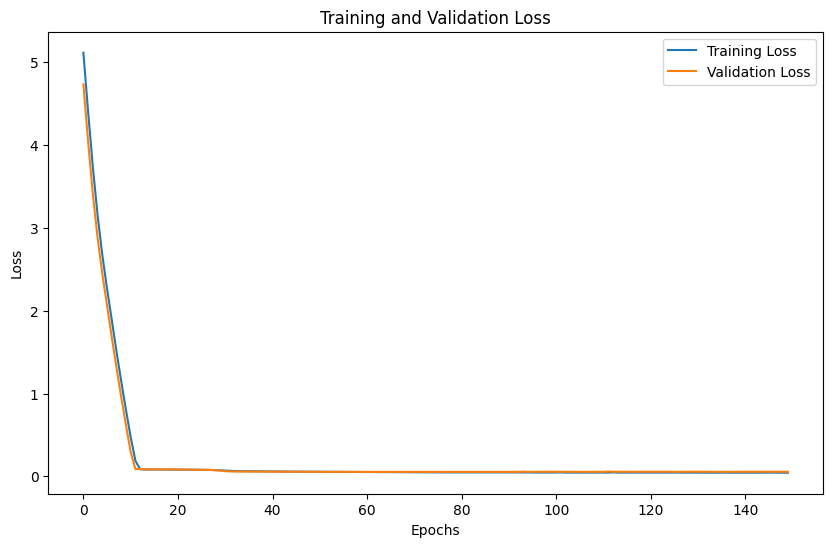

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.300288,0.106412,0.055548,0.009964,0.035556,0.623382
2,Target -> 10 ^ Target,0.435776,92275.116032,64679.463867,0.177618,48252.250000,8.115292


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,32.5,59.583333,84.583333,97.083333,8.115292


Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.6215 - val_loss: 6.0717
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8885 - val_loss: 5.3669
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1945 - val_loss: 4.7345
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5851 - val_loss: 4.2115
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1018 - val_loss: 3.7910
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6983 - val_loss: 3.4373
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3549 - val_loss: 3.1232
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0490 - val_loss: 2.8389
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7702 - val_loss: 2.5760
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5110 - val_loss: 2.3277
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2656 - val_loss: 2.0893
Epoch 12/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0

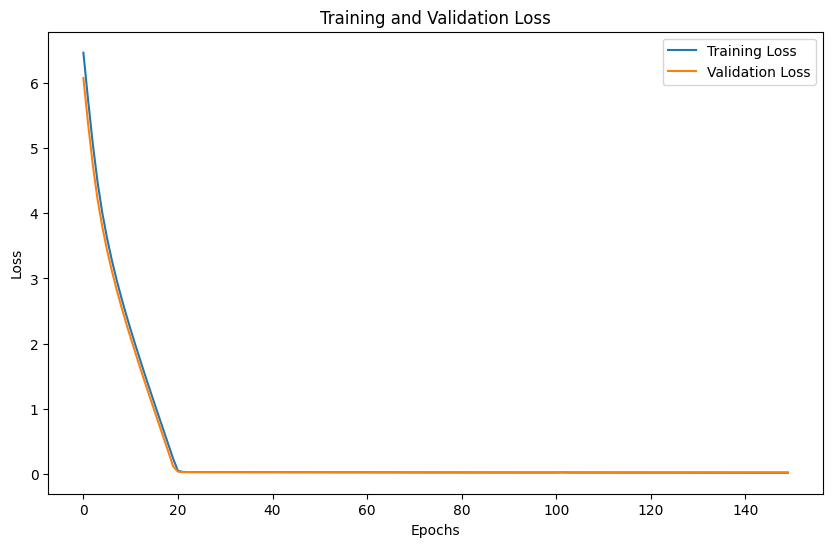

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.010265,0.038887,0.031008,0.005231,0.02644,0.445332
2,Target -> 10 ^ Target,0.015620,76938.323331,61499.587340,0.072554,53391.28125,5.997511


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,42.735043,73.076923,95.726496,100.0,5.997511


Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.6252 - val_loss: 3.9388
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7121 - val_loss: 3.0337
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8201 - val_loss: 2.2160
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0448 - val_loss: 1.5570
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4202 - val_loss: 1.0294
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9117 - val_loss: 0.5657
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4575 - val_loss: 0.1238
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0720 - val_loss: 0.0556
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0473 - val_loss: 0.0501
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0466 - val_loss: 0.0490
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0441 - val_loss: 0.0483
Epoch 12/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

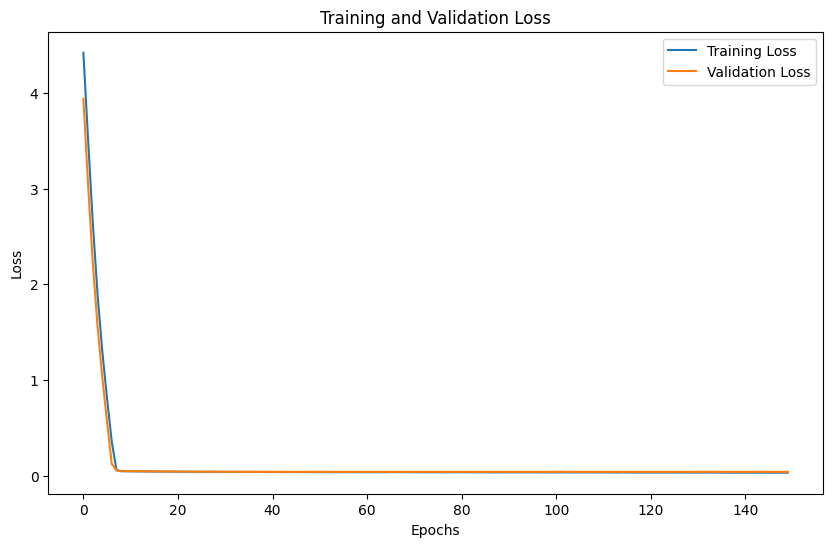

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.102515,0.050512,0.041657,0.006843,0.037409,0.621293
2,Target -> 10 ^ Target,0.123196,145298.538756,119671.824103,0.097506,110006.375000,8.528412


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,29.113924,57.805907,91.561181,100.0,8.528412


Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.2542 - val_loss: 5.7260
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5522 - val_loss: 5.0239
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8512 - val_loss: 4.3470
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1816 - val_loss: 3.7346
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6050 - val_loss: 3.2160
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0983 - val_loss: 2.7846
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6953 - val_loss: 2.4083
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3191 - val_loss: 2.0621
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9775 - val_loss: 1.7323
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6528 - val_loss: 1.4082
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3303 - val_loss: 1.0743
Epoch 12/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9

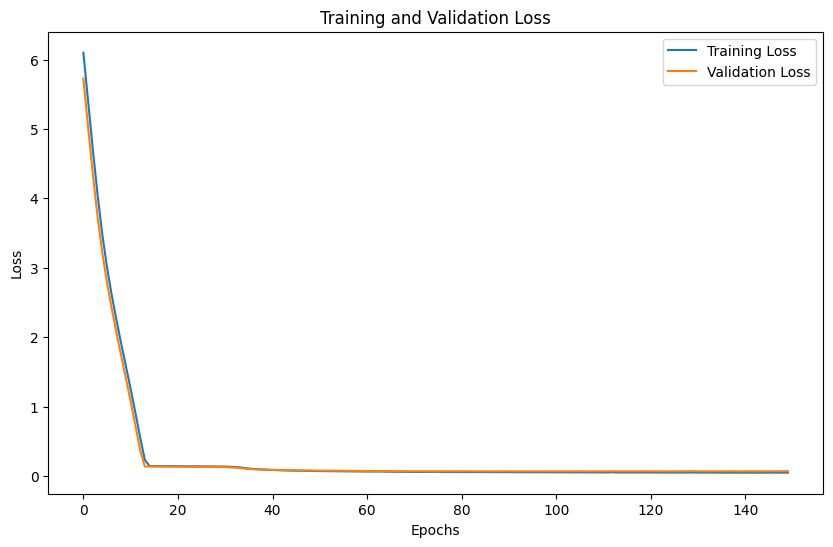

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.798273,9.597155e-02,0.066883,0.010372,0.048272,0.762699
2,Target -> 10 ^ Target,0.774139,1.298140e+06,520225.717161,0.155962,303240.375000,10.947199


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,23.305085,48.728814,72.033898,97.033898,10.947199


In [17]:
neural_networks = {}
for i in df_not_scaled['price_quantile'].unique():
    train_data = train_df[train_df['price_quantile'] == i]
    test_data = test_df[test_df['price_quantile'] == i]
    
    features_train = train_data[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
    target_train = train_data['log_price']

    features_test = test_data[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                            "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                            'hasCooling']]
    target_test = test_data['log_price']

    scaler = StandardScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_test_scaled = scaler.transform(features_test)
    model = Sequential([
        Dense(64, activation='relu'),
        Dense(32, activation='sigmoid'),
        Dense(16, activation='sigmoid'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_absolute_error')

    history = model.fit(features_train_scaled, target_train, epochs=150, batch_size=32, validation_split=0.2)

    loss = model.evaluate(features_test_scaled, target_test)
    
    neural_networks[i] = model
    print(f'Test Loss: {loss}')

    plt.figure(figsize=(10, 6))
    plt.title('Training and Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    y_pred = model.predict(features_test_scaled)
    show_metrics(y_pred.flatten(), target_test.to_numpy(), target_scaler=False, logarithm=True)


In [41]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def predict_price(features, quantile_model, neural_networks):
    predicted_quantiles = quantile_model.predict(features)#.argmax(axis=1)
    
    predicted_quantiles = predicted_quantiles.astype(int)
    
    predicted_prices = np.zeros(features.shape[0])
    for i, quantile in enumerate(predicted_quantiles):
        network = neural_networks[quantile]
        predicted_prices[i] = network.predict(features[i].reshape(1, -1))[0]
    
    return predicted_prices

features_train = train_df[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target_train = train_df['log_price']

features_test = test_df[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target_test = test_df['log_price']

scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

y_pred = predict_price(features_test_scaled, quantile_model2, neural_networks)

show_metrics(y_pred, target_test.to_numpy(), target_scaler=False, logarithm=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

C:\Users\ALI\AppData\Local\Temp\ipykernel_14488\3011070911.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_prices[i] = network.predict(features[i].reshape(1, -1))[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.599595,1.783821e-01,0.130178,0.021439,0.100314,1.674455
2,Target -> 10 ^ Target,0.479156,1.231147e+06,611196.780937,0.385535,205583.731159,22.353571


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,14.044351,24.920803,44.878564,80.464625,22.353571
